In [2]:
# import needed libraries for data manipulation and display
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# convert our data from a csv file into a Pandas Dataframe
df = pd.read_csv('heart.csv')

In [4]:
# View the first few lines of code to look for missing data, strange values, and any string simplification that is needed
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Age: age of the patient [years]<br>
Sex: sex of the patient [M: Male, F: Female]<br>
Chest Pain Type: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br>
Resting BP: resting blood pressure [mm Hg]<br>
Cholesterol: serum cholesterol [mm/dl]<br>
Fasting BS: fasting blood sugar [1: if Fasting BS > 120 mg/dl, 0: otherwise]<br>
Resting ECG: resting electrocardiogram results<br>
[Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression<br>
of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria].<br>
Max HR: maximum heart rate achieved [Numeric value between 60 and 202]<br>
Exercise Angina: exercise-induced angina [Y: Yes, N: No]<br>
Old peak: old peak = ST [Numeric value measured in depression]<br>
ST _Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: down sloping]<br>
Heart Disease: output class [1: heart disease, 0: Normal]

In [5]:
# convert all strings in column names and values to lower case and replace spaces with underscores for more consistent reference
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
# get a list of column names for grouping into categories and numerical data
df.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [7]:
# check the data types
df.dtypes

age                 int64
sex                object
chestpaintype      object
restingbp           int64
cholesterol         int64
fastingbs           int64
restingecg         object
maxhr               int64
exerciseangina     object
oldpeak           float64
st_slope           object
heartdisease        int64
dtype: object

In [8]:
categorical = ['sex', 'chestpaintype', 'restingecg', 'exerciseangina', 'st_slope']

numerical = ['age', 'restingbp', 'cholesterol','fastingbs', 'maxhr', 'oldpeak']

df[categorical].nunique()

sex               2
chestpaintype     4
restingecg        3
exerciseangina    2
st_slope          3
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [11]:
#del df_train_full['heartdisease']
df_train_full.iloc[0].to_dict()

{'age': 43,
 'sex': 'm',
 'chestpaintype': 'asy',
 'restingbp': 120,
 'cholesterol': 177,
 'fastingbs': 0,
 'restingecg': 'lvh',
 'maxhr': 120,
 'exerciseangina': 'y',
 'oldpeak': 2.5,
 'st_slope': 'flat',
 'heartdisease': 1}

In [12]:
df_train.columns

Index(['age', 'sex', 'chestpaintype', 'restingbp', 'cholesterol', 'fastingbs',
       'restingecg', 'maxhr', 'exerciseangina', 'oldpeak', 'st_slope',
       'heartdisease'],
      dtype='object')

In [13]:
y_train = df_train.heartdisease.values
y_val = df_val.heartdisease.values

In [14]:
y_train.shape

(550,)

In [15]:
del df_train['heartdisease']
del df_val['heartdisease']

In [16]:
y_train.shape

(550,)

In [17]:
df_train_full.isnull().sum()

age               0
sex               0
chestpaintype     0
restingbp         0
cholesterol       0
fastingbs         0
restingecg        0
maxhr             0
exerciseangina    0
oldpeak           0
st_slope          0
heartdisease      0
dtype: int64

In [18]:
## This cell is for generating the Pydantic BaseModel Class

for c in categorical:
    print(df[c].value_counts())
    print()

for n in numerical:
    print(df[n].describe())
    print()

sex
m    725
f    193
Name: count, dtype: int64

chestpaintype
asy    496
nap    203
ata    173
ta      46
Name: count, dtype: int64

restingecg
normal    552
lvh       188
st        178
Name: count, dtype: int64

exerciseangina
n    547
y    371
Name: count, dtype: int64

st_slope
flat    460
up      395
down     63
Name: count, dtype: int64

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

count    918.000000
mean     132.396514
std       18.514154
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: restingbp, dtype: float64

count    918.000000
mean     198.799564
std      109.384145
min        0.000000
25%      173.250000
50%      223.000000
75%      267.000000
max      603.000000
Name: cholesterol, dtype: float64

count    918.000000
mean       0.233115
std        0.423046
min        0.000000

In [18]:
df['age'].describe().to_dict()

{'count': 918.0,
 'mean': 53.510893246187365,
 'std': 9.43261650673201,
 'min': 28.0,
 '25%': 47.0,
 '50%': 54.0,
 '75%': 60.0,
 'max': 77.0}

In [ ]:
# plotted histograms and corresponding bin tables looking for outliers
# cholesterol levels in the lowest bin below are all zero and levels below 60 are rare.  I'm assuming it was missing data.
# fastingbs is either one or zero as stated in the description above.  interpreted as being already "hot coded".  
# decided to leave it in the numerical list.
for n in numerical:
    # Create the plot
    plt.figure(figsize=(5, 3))
    # Plot the histo
    plt.hist(df[n],bins=30, color='black')
    plt.yscale('log')
    plt.legend([str(n)])
    plt.show()

    counts, bin_edges, _ = plt.hist(df[n], bins=30)
    plt.close()
    
    # Create bin labels
    bin_labels = [f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}" for i in range(len(counts))]
    
    # Create a Pandas DataFrame
    histogram_table = pd.DataFrame({
        'Bin': bin_labels,
        'Count': counts.astype(int)
    })
    
    print(histogram_table)

In [19]:
# 88% of patient with zero/missing cholesterol levels had heart disease
print(df.heartdisease[(df.cholesterol==0)].sum()/df.heartdisease[(df.cholesterol==0)].count())

# ignoring the missing cholesterol patients reveals an almost 50/50 split. 
# analysis below shows that patients with heart disease have higher cholesterol levels
print(df.heartdisease[(df.cholesterol>0)].sum()/df.heartdisease[(df.cholesterol>0)].count())

0.8837209302325582
0.4772117962466488


In [29]:
dfc = df_train_full[df.cholesterol>0].reset_index()
dfc[numerical].corrwith(dfc.heartdisease).to_frame('correlation')

/tmp/ipykernel_9814/4201760362.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc = df_train_full[df.cholesterol>0].reset_index()


,correlation
age,0.282846
restingbp,0.174259
cholesterol,0.079746
fastingbs,0.117092
maxhr,-0.348710
oldpeak,0.478397


## Feature Importance

In [65]:
from IPython.display import display

In [191]:
global_mean = df_train_full.heartdisease.mean()
round(global_mean, 3)

np.float64(0.542)

In [193]:
global_mean = df_train_full.heartdisease.mean()
global_mean

np.float64(0.5422343324250681)

In [194]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).heartdisease.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
sex,,,
f,0.254777,-0.287457,0.469865
m,0.620451,0.078216,1.144248


,mean,diff,risk
chestpaintype,,,
asy,0.774112,0.231877,1.427633
ata,0.120301,-0.421934,0.221861
nap,0.345238,-0.196996,0.636695
ta,0.487179,-0.055055,0.898467


,mean,diff,risk
restingecg,,,
lvh,0.519737,-0.022497,0.958510
normal,0.511468,-0.030766,0.943260
st,0.657534,0.115300,1.212639


,mean,diff,risk
exerciseangina,,,
n,0.349099,-0.193135,0.643816
y,0.837931,0.295697,1.545330


,mean,diff,risk
st_slope,,,
down,0.717949,0.175714,1.324056
flat,0.809651,0.267417,1.493176
up,0.211180,-0.331054,0.389463


### The characteristics with the highest risk of heart disease based on the mean are being male, asymptomatic chest pain, having ST ecg abnormalities, having an exercise angina, and a down st slope.

In [195]:
from sklearn.metrics import mutual_info_score

In [196]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.heartdisease)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())

,MI
st_slope,0.184472
chestpaintype,0.151883
exerciseangina,0.123210
sex,0.046335
restingecg,0.006789


In [197]:
df_train_full[numerical].corrwith(df_train_full.heartdisease).to_frame('correlation')

,correlation
age,0.276919
restingbp,0.120185
cholesterol,-0.271679
fastingbs,0.242690
maxhr,-0.395854
oldpeak,0.378351


### The above correlations suggest heart disease is correlated with low cholesterol, but removal of "missing" cholesterol patients that have a level of '0' reveals higher cholesterol levels by 10 on average.

In [30]:
dfc.groupby(by='heartdisease')[numerical].mean()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak
heartdisease,,,,,,
0,50.338509,130.270186,240.108696,0.121118,148.795031,0.406211
1,55.648148,136.185185,249.888889,0.207407,132.162963,1.407037


In [32]:
df_train_full.groupby(by='heartdisease')[numerical].mean()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak
heartdisease,,,,,,
0,50.586310,130.214286,230.104167,0.119048,148.098214,0.416369
1,55.761307,134.500000,169.522613,0.324121,128.082915,1.208291


### *ST slope, chest pain type, and exercise angina have the highest mutual information scores.  
### *Age, old peak and fasting blood sugar have high positive correlation with heart disease.  
### *Patients with heart disease have a mean age 5 years older, higher blood pressure, lower cholesterol, higher blood sugar, lower max heart rate and high st peak depression.

## One Hot Coding

In [38]:
from sklearn.feature_extraction import DictVectorizer

In [39]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

In [40]:
train_dict[0]

{'sex': 'm',
 'chestpaintype': 'nap',
 'restingecg': 'normal',
 'exerciseangina': 'n',
 'fastingbs': 1,
 'st_slope': 'down',
 'age': 42,
 'restingbp': 120,
 'cholesterol': 240,
 'maxhr': 194,
 'oldpeak': 0.8}

In [41]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [42]:
X_train = dv.transform(train_dict)

In [43]:
X_train.shape

(550, 20)

In [44]:
dv.get_feature_names_out()

array(['age', 'chestpaintype=asy', 'chestpaintype=ata',
       'chestpaintype=nap', 'chestpaintype=ta', 'cholesterol',
       'exerciseangina=n', 'exerciseangina=y', 'fastingbs', 'maxhr',
       'oldpeak', 'restingbp', 'restingecg=lvh', 'restingecg=normal',
       'restingecg=st', 'sex=f', 'sex=m', 'st_slope=down',
       'st_slope=flat', 'st_slope=up'], dtype=object)

# Train Logistic Regression Model

In [206]:
from sklearn.linear_model import LogisticRegression

In [207]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [208]:
LogisticRegression(random_state=1, solver='liblinear')

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [209]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [210]:
y_pred = model.predict_proba(X_val)[:, 1]

In [211]:
y_pred

array([0.91998246, 0.95399056, 0.86702453, 0.58373498, 0.90574976,
       0.88983011, 0.81463847, 0.65129104, 0.01853383, 0.89759325,
       0.66035958, 0.27693237, 0.0215296 , 0.96462809, 0.9458942 ,
       0.97512023, 0.18487164, 0.04175212, 0.23787759, 0.92678825,
       0.02065176, 0.17892634, 0.04192122, 0.88037591, 0.02430184,
       0.94417319, 0.40127431, 0.93474355, 0.93470333, 0.16405576,
       0.81290196, 0.9068659 , 0.40481569, 0.95671945, 0.8680181 ,
       0.04185828, 0.96031022, 0.12598696, 0.92100068, 0.32505031,
       0.11329771, 0.0514713 , 0.01311208, 0.88743799, 0.97774511,
       0.81777833, 0.0049153 , 0.55372779, 0.94048576, 0.05066313,
       0.94855519, 0.736744  , 0.937411  , 0.97506839, 0.97999641,
       0.027393  , 0.16913936, 0.33023312, 0.06195197, 0.13312658,
       0.14466612, 0.99114045, 0.89766537, 0.22799484, 0.30269773,
       0.7201653 , 0.07046317, 0.15598371, 0.92285653, 0.0166112 ,
       0.32246872, 0.99040566, 0.99551527, 0.95893283, 0.93539

## Thresholds vs Accuracy

In [212]:
heartdisease = y_pred > 0.55

In [213]:
(y_val == heartdisease).mean()

np.float64(0.8532608695652174)

In [214]:
from sklearn.metrics import accuracy_score

In [215]:
accuracy_score(y_val, y_pred >= 0.55)

0.8532608695652174

In [216]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.533
0.05 0.674
0.10 0.701
0.15 0.739
0.20 0.777
0.25 0.810
0.30 0.810
0.35 0.842
0.40 0.848
0.45 0.837
0.50 0.842
0.55 0.853
0.60 0.842
0.65 0.842
0.70 0.821
0.75 0.799
0.80 0.799
0.85 0.772
0.90 0.728
0.95 0.625
1.00 0.467


## A threshold of 0.55 yields the highest accuracy score of 0.853. (validation only)

In [217]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [218]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

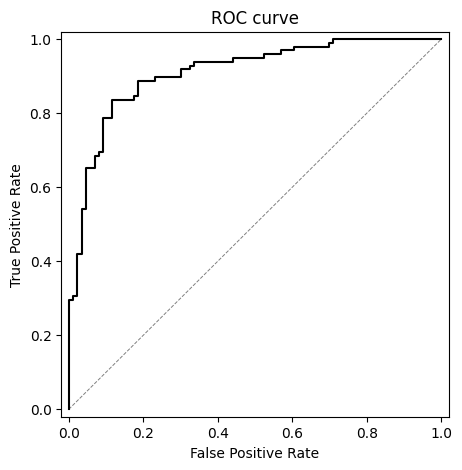

In [219]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## K-fold Cross-validation

In [220]:
def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [221]:
from sklearn.model_selection import KFold

In [222]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [223]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.heartdisease.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.heartdisease.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [224]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.919 ± 0.026


In [225]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model

### Tuning the C parameter

In [226]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.heartdisease.values
        y_val = df_val.heartdisease.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.806 ± 0.026
C=0.01, auc = 0.891 ± 0.031
C=0.1, auc = 0.918 ± 0.027
C=0.5, auc = 0.919 ± 0.026
C=1, auc = 0.919 ± 0.025
C=10, auc = 0.918 ± 0.025


### C=1 gives the best result

In [227]:
y_train = df_train_full.heartdisease.values
y_test = df_test.heartdisease.values

dv, model = train(df_train_full, y_train, C=1)
y_pred_LR = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred_LR)
print('auc = %.3f' % auc)

auc = 0.954


## Logistic Regression has an ROC_AUC score of 0.954.
<br>
<br>
<br>


# Train RandomForrestRegression Model

In [94]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [95]:
y_train = df_train.heartdisease.values
y_val = df_val.heartdisease.values

In [96]:
del df_train['heartdisease']
del df_val['heartdisease']

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [99]:
y_train.shape

(550,)

## Parameter tuning the RFR model using rmse

10 -> 0.364
20 -> 0.361
30 -> 0.363
40 -> 0.364
50 -> 0.366
60 -> 0.367
70 -> 0.366
80 -> 0.365
90 -> 0.366
100 -> 0.366
110 -> 0.364
120 -> 0.364
130 -> 0.363
140 -> 0.363
150 -> 0.363
160 -> 0.363
170 -> 0.363
180 -> 0.363
190 -> 0.362
200 -> 0.362


Text(0, 0.5, 'rmse')

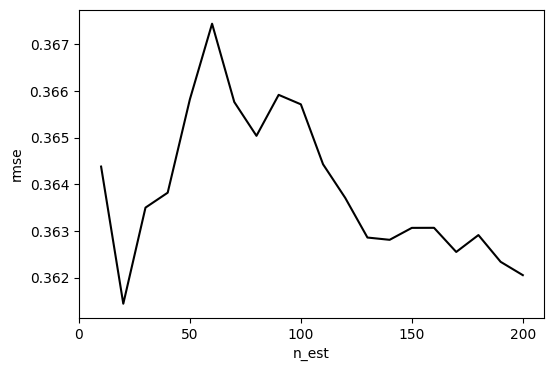

In [79]:
scores = []

for i in range(10,201,10):

    rf = RandomForestRegressor(n_estimators=i,
                               random_state=1,
                               n_jobs=-1)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)
    score = rmse(y_pred,y_val)
    scores.append(score)
    print('%s -> %.3f' % (i,score))
    
plt.figure(figsize=(6, 4))
plt.plot(range(10,201,10), scores, color='black') 
plt.xticks(range(0, 201, 50))
plt.xlabel('n_est') 
plt.ylabel('rmse')

## 20 estimators produces the lowest rmse.

In [80]:
scores = []

for dep in [5, 10, 15]:
    print('depth: %s' % dep)
    
    for i in range(5,201,10):
        rf = RandomForestRegressor(n_estimators=i, max_depth=dep,
                                   random_state=1,
                                   n_jobs=-1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict(X_val)
        score = rmse(y_pred,y_val)
        scores.append(score)
        print('%s,%d -> %.3f' % (i,dep,score))

    print()

depth: 5
5,5 -> 0.378
15,5 -> 0.363
25,5 -> 0.365
35,5 -> 0.364
45,5 -> 0.364
55,5 -> 0.364
65,5 -> 0.363
75,5 -> 0.362
85,5 -> 0.361
95,5 -> 0.362
105,5 -> 0.362
115,5 -> 0.362
125,5 -> 0.362
135,5 -> 0.361
145,5 -> 0.361
155,5 -> 0.361
165,5 -> 0.360
175,5 -> 0.361
185,5 -> 0.360
195,5 -> 0.360

depth: 10
5,10 -> 0.366
15,10 -> 0.355
25,10 -> 0.362
35,10 -> 0.359
45,10 -> 0.363
55,10 -> 0.365
65,10 -> 0.364
75,10 -> 0.364
85,10 -> 0.364
95,10 -> 0.365
105,10 -> 0.364
115,10 -> 0.364
125,10 -> 0.362
135,10 -> 0.363
145,10 -> 0.362
155,10 -> 0.363
165,10 -> 0.361
175,10 -> 0.362
185,10 -> 0.361
195,10 -> 0.361

depth: 15
5,15 -> 0.375
15,15 -> 0.360
25,15 -> 0.365
35,15 -> 0.361
45,15 -> 0.365
55,15 -> 0.367
65,15 -> 0.366
75,15 -> 0.365
85,15 -> 0.366
95,15 -> 0.366
105,15 -> 0.365
115,15 -> 0.365
125,15 -> 0.363
135,15 -> 0.363
145,15 -> 0.363
155,15 -> 0.364
165,15 -> 0.362
175,15 -> 0.363
185,15 -> 0.362
195,15 -> 0.362



## A max_depth of 10 and 15 estimators produces the lowest rmse = 0.355.

In [82]:
for l in [1, 2, 3, 4, 5, 10, 15, 20]:
    rf = RandomForestRegressor(n_estimators=15, max_depth=10, min_samples_leaf=l)
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_val)
    score = rmse(y_pred,y_val)
    scores.append(score)
    print('%s -> %.3f' % (l, score))

1 -> 0.364
2 -> 0.348
3 -> 0.366
4 -> 0.360
5 -> 0.355
10 -> 0.371
15 -> 0.371
20 -> 0.379


## A min_samples_leaf of 2 produces the lowest rmse = 0.348.

In [100]:
rf = RandomForestRegressor(n_estimators=15, min_samples_leaf=2, max_depth=10, random_state=1, n_jobs=-1)
rf.fit(X_train,y_train)
y_predRFR = rf.predict(X_val)

In [101]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_predRFR >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.533
0.05 0.723
0.10 0.745
0.15 0.766
0.20 0.777
0.25 0.788
0.30 0.815
0.35 0.804
0.40 0.810
0.45 0.837
0.50 0.832
0.55 0.837
0.60 0.832
0.65 0.826
0.70 0.815
0.75 0.799
0.80 0.783
0.85 0.766
0.90 0.723
0.95 0.652
1.00 0.582


## RFR model produces an accuracy score of 0.837 at a threshold of 0.55.  Worse than Logistic Regression. (validation only)

In [83]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [230]:
def predict(df, dv, model):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict(X)

    return y_pred

def train(df, y):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = RandomForestRegressor(n_estimators=60, max_depth=10, min_samples_leaf=10)
    model.fit(X, y)

    return dv, model

In [231]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.heartdisease.values
    y_val = df_val.heartdisease.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
        
    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc)

print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.915 ± 0.027


In [86]:
y_train = df_train_full.heartdisease.values
y_test = df_test.heartdisease.values

dv, model = train(df_train_full, y_train, C=0.1)
y_pred_RFR = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred_RFR)
print('auc = %.3f' % auc)

auc = 0.944


## Logistic Regression Model -->  auc = 0.954
## Random Forrest Regression Model --> auc = 0.944




# Train XGBOOST Model

In [150]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [151]:
y_train = df_train.heartdisease.values
y_val = df_val.heartdisease.values

In [152]:
del df_train['heartdisease']
del df_val['heartdisease']

In [153]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [154]:
import xgboost as xgb

In [155]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [278]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

In [279]:
model = xgb.train(xgb_params, dtrain, num_boost_round=30)

In [280]:
y_pred = model.predict(dval)
y_pred[:10]

array([0.6573218 , 0.8625064 , 0.80514807, 0.6805464 , 0.8410821 ,
       0.81316966, 0.7325782 , 0.74195176, 0.07361344, 0.87868714],
      dtype=float32)

In [281]:
roc_auc_score(y_val, y_pred)

0.8925011865211201

In [145]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [283]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

In [284]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=10)

[0]	train-auc:0.90401	val-auc:0.83395
[10]	train-auc:0.93957	val-auc:0.88271
[20]	train-auc:0.94815	val-auc:0.88253
[30]	train-auc:0.95621	val-auc:0.89286
[40]	train-auc:0.96091	val-auc:0.89594
[50]	train-auc:0.96386	val-auc:0.89570
[60]	train-auc:0.96636	val-auc:0.89654
[70]	train-auc:0.96772	val-auc:0.89570
[80]	train-auc:0.96885	val-auc:0.89606
[90]	train-auc:0.97019	val-auc:0.89594
[99]	train-auc:0.97173	val-auc:0.89511


In [285]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [286]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [287]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

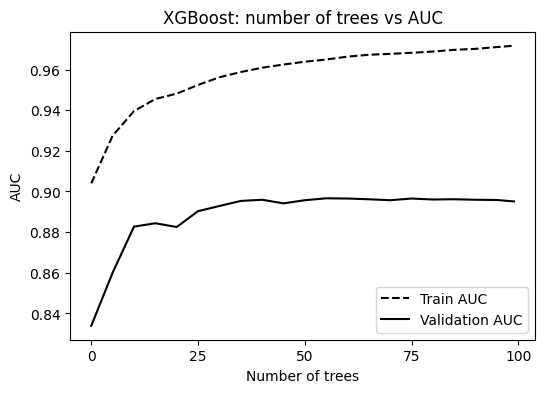

In [288]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

### Parameter tuning: eta

In [243]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 10,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [244]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.89784
(0.89784, 40)


In [245]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [246]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.89903
(0.89903, 60)


In [247]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [248]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.89772
(0.89772, 110)


In [249]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [250]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.89737
(0.89737, 490)


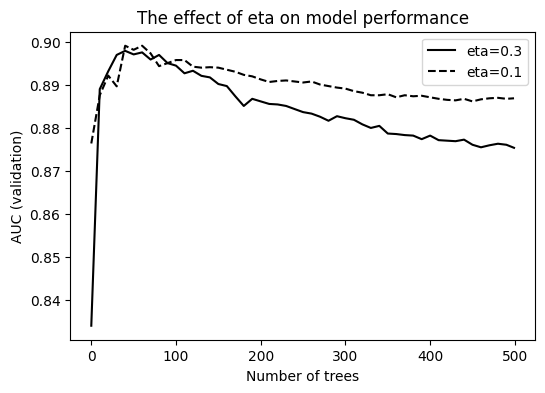

In [251]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')
# plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
# plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta.svg')

plt.show()

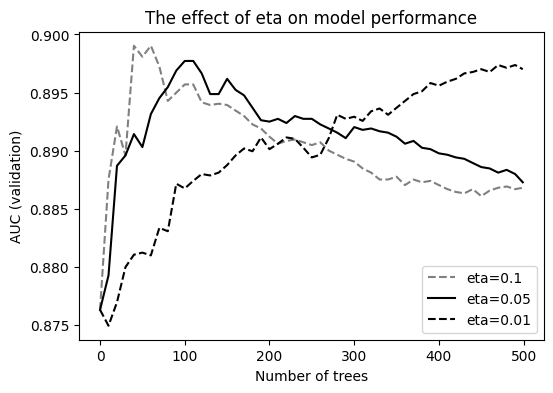

In [252]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_01, color='grey', linestyle='dashed', label='eta=0.1')
plt.plot(tree, aucs_val_eta_005, color='black', linestyle='solid', label='eta=0.05')
plt.plot(tree, aucs_val_eta_001, color='black', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta_2.svg')

plt.show()

## Eta of 0.1 is best!
<br>
<br>
<br>
<br>

## Parameter tuning: max_depth

In [253]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [254]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.90282
(0.90282, 70)


In [255]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [256]:
tree, _, aucs_val_depth10 = parse_xgb_output(output)
print(max(aucs_val))
print(max(zip(aucs_val_depth10, tree)))

0.89665
(0.89582, 70)


In [257]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 4,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [258]:
tree, _, aucs_val_depth4 = parse_xgb_output(output)
print(max(aucs_val_depth4))
print(max(zip(aucs_val_depth4, tree)))

0.89701
(0.89701, 70)


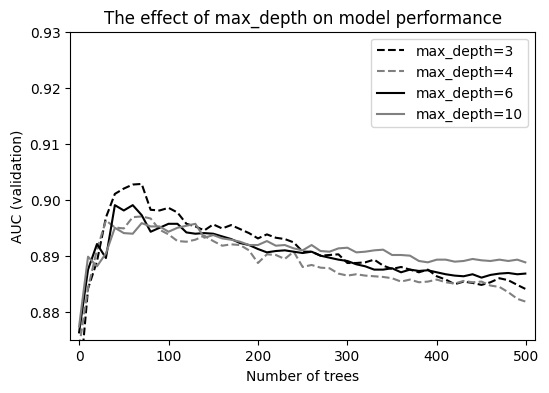

In [259]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_depth3, color='black', linestyle='dashed', label='max_depth=3')
plt.plot(tree, aucs_val_depth4, color='grey', linestyle='dashed', label='max_depth=4')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='solid', label='max_depth=6')
plt.plot(tree, aucs_val_depth10, color='grey', linestyle='solid', label='max_depth=10')

plt.ylim(0.875, 0.93)
plt.xlim(-10, 510)
plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of max_depth on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_depth.svg')

plt.show()

## Max Depth of 3 is best!
<br>
<br>
<br>
<br>

## Parameter tuning: min_child_weight

In [260]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 11,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [261]:
tree, _, aucs_val_mcw5 = parse_xgb_output(output)
print(max(aucs_val_mcw5))
print(max(zip(aucs_val_mcw5, tree)))

0.9052
(0.9052, 70)


In [262]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 9,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [263]:
tree, _, aucs_val_mcw7 = parse_xgb_output(output)
print(max(aucs_val_mcw7))
print(max(zip(aucs_val_mcw7, tree)))

0.90152
(0.90152, 60)


In [264]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 13,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [265]:
tree, _, aucs_val_mcw10 = parse_xgb_output(output)
print(max(aucs_val_mcw10))
print(max(zip(aucs_val_mcw10, tree)))

0.90318
(0.90318, 60)


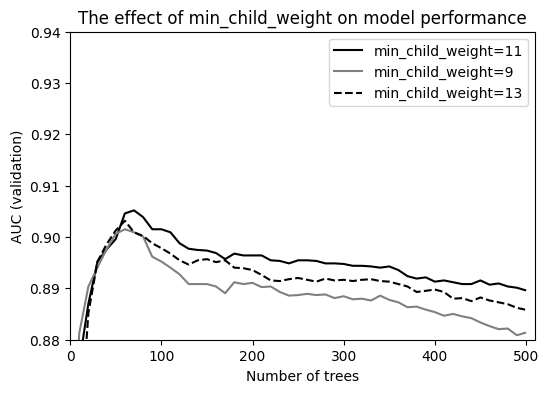

In [266]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_mcw5, color='black', linestyle='solid', label='min_child_weight=11')
plt.plot(tree, aucs_val_mcw7, color='grey', linestyle='solid', label='min_child_weight=9')
plt.plot(tree, aucs_val_mcw10, color='black', linestyle='dashed', label='min_child_weight=13')

plt.ylim(0.88, 0.94)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
#plt.yticks(np.linspace(0.88, 0.94, 0.02))

plt.legend()

plt.title('The effect of min_child_weight on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_mcw.svg')

plt.show()

## Best Parameters:
eta=0.1       <br>
max_depth=3       <br>
min_child_weight=11 <br>

# Checking the best number of trees

In [267]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 11,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [268]:
print(output)

[0]	train-auc:0.89633	val-auc:0.83644
[10]	train-auc:0.93218	val-auc:0.87542
[20]	train-auc:0.94485	val-auc:0.88704
[30]	train-auc:0.95009	val-auc:0.89523
[40]	train-auc:0.95451	val-auc:0.89760
[50]	train-auc:0.95877	val-auc:0.89962
[60]	train-auc:0.96166	val-auc:0.90460
[70]	train-auc:0.96353	val-auc:0.90520
[80]	train-auc:0.96529	val-auc:0.90389
[90]	train-auc:0.96618	val-auc:0.90152
[100]	train-auc:0.96735	val-auc:0.90152
[110]	train-auc:0.96846	val-auc:0.90093
[120]	train-auc:0.96967	val-auc:0.89879
[130]	train-auc:0.97066	val-auc:0.89772
[140]	train-auc:0.97146	val-auc:0.89748
[150]	train-auc:0.97193	val-auc:0.89737
[160]	train-auc:0.97238	val-auc:0.89689
[170]	train-auc:0.97279	val-auc:0.89570
[180]	train-auc:0.97325	val-auc:0.89677
[190]	train-auc:0.97377	val-auc:0.89642
[200]	train-auc:0.97413	val-auc:0.89642
[210]	train-auc:0.97459	val-auc:0.89642
[220]	train-auc:0.97485	val-auc:0.89547
[230]	train-auc:0.97524	val-auc:0.89535
[240]	train-auc:0.97551	val-auc:0.89487
[250]	train

In [269]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))

0.9052


In [270]:
max(zip(aucs_val, tree))

(0.9052, 70)

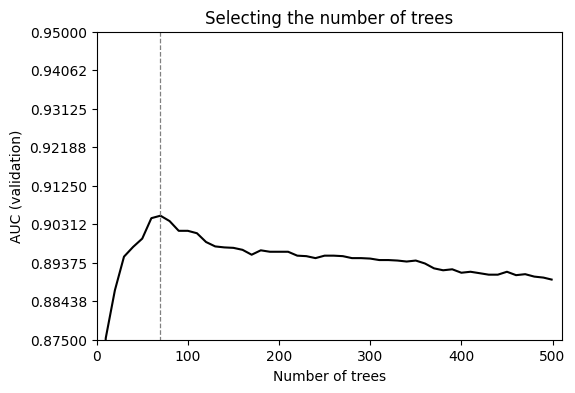

In [271]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val, color='black', linestyle='solid')


plt.ylim(0.875, 0.95)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.875, 0.95, 9))


plt.vlines(70, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_number_trees.svg')

plt.show()

## Final xgboost model

In [162]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 11,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=300, verbose_eval=10, evals=watchlist)

[0]	train-auc:0.87731	val-auc:0.93023
[10]	train-auc:0.91254	val-auc:0.97287
[20]	train-auc:0.92510	val-auc:0.98062
[30]	train-auc:0.93097	val-auc:0.98527
[40]	train-auc:0.93480	val-auc:0.98682
[50]	train-auc:0.93900	val-auc:0.98915
[60]	train-auc:0.94235	val-auc:0.98915
[70]	train-auc:0.94412	val-auc:0.98992
[80]	train-auc:0.94515	val-auc:0.98915
[90]	train-auc:0.94531	val-auc:0.99147
[100]	train-auc:0.94623	val-auc:0.99070
[110]	train-auc:0.94684	val-auc:0.99147
[120]	train-auc:0.94739	val-auc:0.99302
[130]	train-auc:0.94809	val-auc:0.99302
[140]	train-auc:0.94833	val-auc:0.99302
[150]	train-auc:0.94835	val-auc:0.99535
[160]	train-auc:0.94851	val-auc:0.99535
[170]	train-auc:0.94865	val-auc:0.99535
[180]	train-auc:0.94916	val-auc:0.99457
[190]	train-auc:0.94953	val-auc:0.99612
[200]	train-auc:0.94977	val-auc:0.99690
[210]	train-auc:0.95004	val-auc:0.99690
[220]	train-auc:0.95007	val-auc:0.99690
[230]	train-auc:0.95038	val-auc:0.99690
[240]	train-auc:0.95048	val-auc:0.99690
[250]	train

In [163]:
y_pred_XGB = model.predict(dval)

In [164]:
roc_auc_score(y_val, y_pred_XGB)

0.8947555766492643

## Accuracy Score for xgboost model

In [110]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [112]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 11,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=300)

In [114]:
y_predXGB = model.predict(dval)

In [115]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_predXGB >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.533
0.05 0.717
0.10 0.750
0.15 0.772
0.20 0.777
0.25 0.793
0.30 0.793
0.35 0.821
0.40 0.821
0.45 0.832
0.50 0.832
0.55 0.837
0.60 0.848
0.65 0.837
0.70 0.826
0.75 0.821
0.80 0.799
0.85 0.755
0.90 0.734
0.95 0.663
1.00 0.467


### The xgboost model produces an accuracy of 0.848 at a threshold of 0.60. (validation only)
### The logistic regression model had an accuracy of 0.853 at a threshold of 0.55. (validation only)
<br>
<br>
<br>

## Kfold Cross Validation for xgboost model.

In [130]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [133]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [134]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.heartdisease.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.heartdisease.values

    train_dict = df_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.transform(train_dict)

    val_dict = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
    dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

    xgb_params = {
        'eta': 0.1,
        'max_depth': 3,
        'min_child_weight': 11,
    
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=70)

    y_pred = model.predict(dval)
    
    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [135]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.925 ± 0.029


### For the same kfold parameters:
### Logistic Regression model had a mean auc = 0.916 ± 0.038.
### Xgboost model has a mean auc = 0.925 ± 0.029.
<br>
<br>
<br>

## XGBOOST full train and test

In [165]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [166]:
y_train = df_train_full.heartdisease.values
y_test = df_test.heartdisease.values

In [167]:
del df_train_full['heartdisease']
del df_test['heartdisease']

In [168]:
train_full_dict = df_train_full[categorical + numerical].to_dict(orient='records')
X_train_full = dv.transform(train_full_dict)

test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [169]:
dtrain_full = xgb.DMatrix(X_train_full, label=y_train, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

In [170]:
xgb_params = {
    'eta': 0.1,
    'max_depth': 3,
    'min_child_weight': 11,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain_full,
                  num_boost_round=300)

In [171]:
y_pred_XGB = model.predict(dtest)

In [228]:
# These use the full train and test data.  Notice the ALL CAP Abbrevations as suffixes.
print(roc_auc_score(y_test, y_pred_LR))
print(roc_auc_score(y_test, y_pred_RFR))
print(roc_auc_score(y_test, y_pred_XGB))

0.9536855036855038
0.9442260442260442
0.9561425061425062


## XGBOOST has a very slightly larger roc_auc_score of 0.956 which is 0.0025 higher.  (full train vs test data)
## XGBOOST has a higher kfold cross validation auc score of 0.925 with smaller standard devation. (validation only / no test)
## Logistic Regression has a higher accuracy score of 0.853. (validation only / no test)